In [27]:
import os
import matplotlib.pyplot as plt
from tqdm import tqdm
from pathlib import Path
import cv2 as cv
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization
from tensorflow.keras.models import Sequential
np.random.seed(42)

In [86]:
dir="./fruits-360-original-size/fruits-360-original-size/Training/"
dir2="./fruits-360-original-size/fruits-360-original-size/Validation"
dir3="./fruits-360-original-size/fruits-360-original-size/Test"
labels=os.listdir(dir)
count=[]
for i,k in enumerate(labels):
    count.append(len(os.listdir(dir+k)))
a={}

for i,k in enumerate(labels):
    a[labels[i]]=i
print(a)


def getLabelPath(dir):
    result=Path(dir).rglob("*.jpg")
    result=[i for i in result]
    return result

def insertImgLabel(path):
    x=[]
    y=[]
    for i in tqdm(path):
        
        img=cv.imread(str(i))
        img=cv.resize(img,dsize=(100,100))
        img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
        img=img/255
        x.append(np.array(img))
        y.append(a[str(i).split("\\")[-2]])
    label=to_categorical(y,num_classes=24)
    x=np.array(x).reshape(-1,100,100,3)
    
    return x,np.array(label)
    
x,label=insertImgLabel(getLabelPath(dir))
valid_x,valid_label=insertImgLabel(getLabelPath(dir2))
test_x,test_label=insertImgLabel(getLabelPath(dir3))

  0%|▏                                                                              | 19/6231 [00:00<00:32, 189.46it/s]

{'apple_6': 0, 'apple_braeburn_1': 1, 'apple_crimson_snow_1': 2, 'apple_golden_1': 3, 'apple_golden_2': 4, 'apple_golden_3': 5, 'apple_granny_smith_1': 6, 'apple_hit_1': 7, 'apple_pink_lady_1': 8, 'apple_red_1': 9, 'apple_red_2': 10, 'apple_red_3': 11, 'apple_red_delicios_1': 12, 'apple_red_yellow_1': 13, 'apple_rotten_1': 14, 'cabbage_white_1': 15, 'carrot_1': 16, 'cucumber_1': 17, 'cucumber_3': 18, 'eggplant_violet_1': 19, 'pear_1': 20, 'pear_3': 21, 'zucchini_1': 22, 'zucchini_dark_1': 23}


100%|█████████████████████████████████████████████████████████████████████████████| 3110/3110 [00:14<00:00, 216.98it/s]


In [87]:
def model():
    model=Sequential()
    model.add(Conv2D(64,(3,3),(2,2),padding="same",activation="relu",input_shape=(100,100,3)))
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.3))
    model.add(Conv2D(128,(3,3),(2,2),padding="same",activation="relu",))
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.3))
    model.add(Conv2D(256,(3,3),(2,2),padding="same",activation="relu",))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(512,activation="relu"))
    model.add(Dense(24,activation="softmax"))
    return model



In [88]:
model1=model()
model1.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
history=model1.fit(x,label,batch_size=64,epochs=24,verbose=1,validation_data=(valid_x,valid_label))



Epoch 1/24
98/98 [==============================] - 6s 46ms/step - loss: 1.4185 - accuracy: 0.5527 - val_loss: 0.2322 - val_accuracy: 0.9297
Epoch 2/24
98/98 [==============================] - 3s 34ms/step - loss: 0.2261 - accuracy: 0.9186 - val_loss: 0.0808 - val_accuracy: 0.9692
Epoch 3/24
98/98 [==============================] - 3s 32ms/step - loss: 0.1241 - accuracy: 0.9575 - val_loss: 0.0269 - val_accuracy: 0.9949
Epoch 4/24
98/98 [==============================] - 3s 32ms/step - loss: 0.0828 - accuracy: 0.9721 - val_loss: 0.0556 - val_accuracy: 0.9801
Epoch 5/24
98/98 [==============================] - 3s 33ms/step - loss: 0.0535 - accuracy: 0.9838 - val_loss: 0.0240 - val_accuracy: 0.9958
Epoch 6/24
98/98 [==============================] - 3s 32ms/step - loss: 0.0374 - accuracy: 0.9888 - val_loss: 0.0074 - val_accuracy: 1.0000
Epoch 7/24
98/98 [==============================] - 3s 32ms/step - loss: 0.0429 - accuracy: 0.9862 - val_loss: 0.0188 - val_accuracy: 0.9929
Epoch 8/24
98

In [89]:
c=history.history

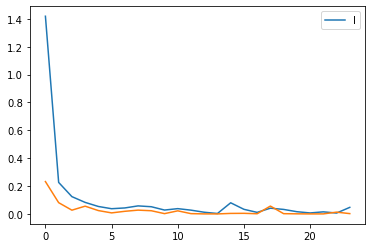

In [91]:
val_loss=c["val_loss"]
val_accuracy=c["val_accuracy"]
loss=c["loss"]
accuracy=c["accuracy"]
plt.plot(loss)
plt.legend("loss")
plt.plot(val_loss)


In [92]:
predicted=model1.predict(test_x,batch_size=256,verbose=1)

13/13 [==============================] - 0s 25ms/step


In [93]:
preds_argmax=[x.argmax() for x in predicted]
test_argmax=[x.argmax() for x in test_label]

In [94]:
from sklearn.metrics import confusion_matrix as cm

In [98]:
cm(test_argmax,preds_argmax)

array([[157,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 160,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 159,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 154,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   3, 151,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 158,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 160,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0

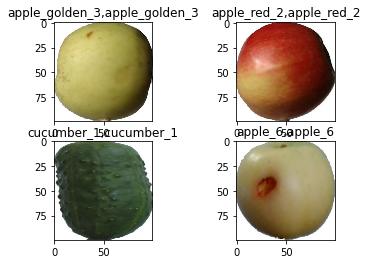

In [107]:
for i,k in enumerate(labels):
    a[i]=labels[i]
fig,ax=plt.subplots(2,2)
for i in range(2):
    for j in range(2):
        rand_num=np.random.randint(0,3000)
        ax[i][j].imshow(test_x[rand_num])
        ax[i][j].set_title(f"{a[test_argmax[rand_num]]},{a[preds_argmax[rand_num]]}")
        